# Urban Air Quality and Respiratory Health Analysis

In [ ]:
This notebook analyzes global air pollution data to identify trends in air quality across different countries and pollutants.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset

In [5]:
df = pd.read_csv('global air pollution dataset.csv')
print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

In [ ]:
# Clean data: check for any missing values

In [8]:
missing_values = df.isnull()
columns_with_missing = df.columns[df.isnull().any()].tolist()
missing_count = df.isnull().sum()
rows_with_missing = df[df.isnull().any(axis=1)]

print(columns_with_missing)
print(missing_count)
print(rows_with_missing)

['Country', 'City']
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64
      Country                City  AQI Value AQI Category  CO AQI Value  \
535       NaN           Granville         30         Good             1   
654       NaN  Kingston Upon Hull         33         Good             1   
787       NaN       New Waterford         20         Good             1   
801       NaN           Kingstown        163    Unhealthy             0   
906       NaN            Nanakuli         30         Good             0   
...       ...                 ...        ...          ...           ...   
22979     NaN           Kyaikkami         54     Moderate             0   
23115     NaN                Bima         25         Go

In [ ]:
# Clean data: print the rows with the missing data for the relevant columns with null values

In [61]:
missing_countries = df[df['Country'].isnull()]
relevant_columns = ['Country', 'City']
missing_countries_relevant = missing_countries[relevant_columns]
print(missing_countries_relevant)

      Country                City
535       NaN           Granville
654       NaN  Kingston Upon Hull
787       NaN       New Waterford
801       NaN           Kingstown
906       NaN            Nanakuli
...       ...                 ...
22979     NaN           Kyaikkami
23115     NaN                Bima
23311     NaN           Marapanim
23345     NaN             Calbuco
23420     NaN          Sungairaya

[427 rows x 2 columns]


In [ ]:
# Clean data: print the total number of rows

In [10]:
print(df.shape[0])

23463


In [ ]:
# Clean data: print the total number of rows after cleaning the null values to compare

In [12]:
df_cleaned = df.dropna(subset=['Country', 'City'])
print(df_cleaned.shape[0])

23035


In [ ]:
# Save the cleaned data to a new csv file to work with

In [14]:
df_cleaned.to_csv('cleaned global air pollution dataset.csv', index=False)

In [ ]:
# Load the new dataset

In [16]:
dfc = pd.read_csv('cleaned global air pollution dataset.csv')
print(dfc.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

In [ ]:
# Confirm there are no missing values

In [18]:
missing_values = dfc.isnull()
columns_with_missing = dfc.columns[dfc.isnull().any()].tolist()
missing_count = dfc.isnull().sum()
rows_with_missing = dfc[dfc.isnull().any(axis=1)]

print("Columns with missing values:", columns_with_missing)
print("Missing value counts:\n", missing_count)
print("Rows with missing values:\n", rows_with_missing)

Columns with missing values: []
Missing value counts:
 Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64
Rows with missing values:
 Empty DataFrame
Columns: [Country, City, AQI Value, AQI Category, CO AQI Value, CO AQI Category, Ozone AQI Value, Ozone AQI Category, NO2 AQI Value, NO2 AQI Category, PM2.5 AQI Value, PM2.5 AQI Category]
Index: []


In [ ]:
# Select relevant data to analyze AQI values

In [20]:
relevant_data = dfc[['Country', 'City', 'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].copy()

In [ ]:
# Perform a correlation analysis

In [22]:
numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
numeric_data = relevant_data[numeric_columns]

correlations = numeric_data.corr()['AQI Value'].sort_values(ascending=False)
print("Correlations with overall AQI:\n", correlations)

Correlations with overall AQI:
 AQI Value          1.000000
PM2.5 AQI Value    0.984518
CO AQI Value       0.429643
Ozone AQI Value    0.405086
NO2 AQI Value      0.230845
Name: AQI Value, dtype: float64


In [ ]:
# Visualize pollutent distributions with a boxplot

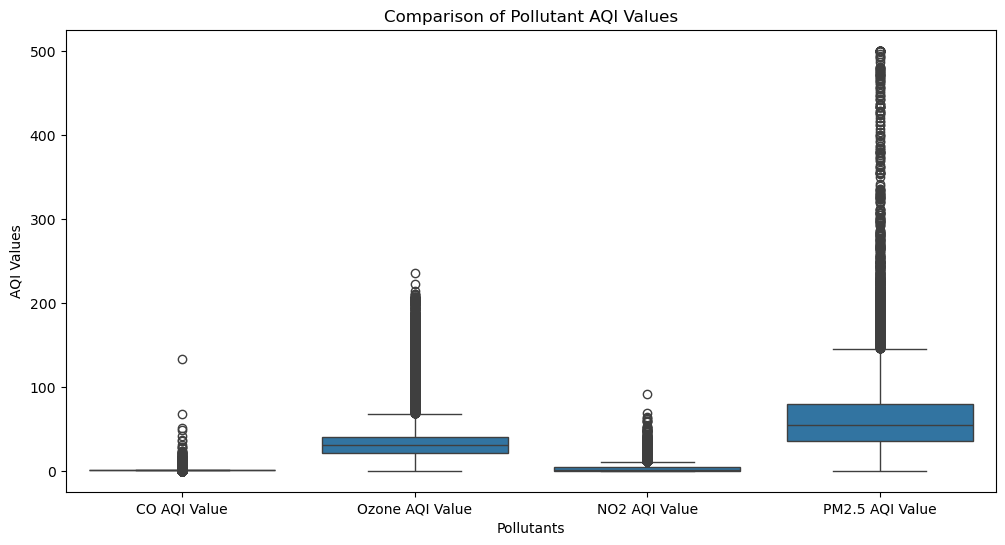

In [24]:
melted_dfc = relevant_data.melt(id_vars=['Country', 'City'], 
                                value_vars=['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'],
                                var_name='Pollutant', 
                                value_name='AQI')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pollutant', y='AQI', data=melted_dfc)
plt.title('Comparison of Pollutant AQI Values')
plt.xlabel('Pollutants')
plt.ylabel('AQI Values')
plt.show()

In [ ]:
# Categorize overall AQI values

In [26]:
def categorize_aqi(value):
    if value <= 50:
        return 'Good'
    elif value <= 100:
        return 'Moderate'
    elif value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 200:
        return 'Unhealthy'
    elif value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [ ]:
# Categorize the pollutants to the category

In [28]:
for pollutant in ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']:
    relevant_data[f'{pollutant} Category'] = relevant_data[pollutant].apply(categorize_aqi)

In [30]:
unhealthy_regions = relevant_data[
    (relevant_data['AQI Value'] > 100) |
    (relevant_data['CO AQI Value'] > 100) |
    (relevant_data['Ozone AQI Value'] > 100) |
    (relevant_data['NO2 AQI Value'] > 100) |
    (relevant_data['PM2.5 AQI Value'] > 100)
]

In [32]:
relevant_data['AQI Value Category'] = relevant_data['AQI Value'].apply(categorize_aqi)

In [ ]:
# Calculate the mean of the AQI values in the unhealthy regions

In [34]:
pollutant_means = unhealthy_regions[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().sort_values(ascending=False)
print("Average pollutant levels in unhealthy regions:\n", pollutant_means)

Average pollutant levels in unhealthy regions:
 PM2.5 AQI Value    161.553100
Ozone AQI Value     59.943217
NO2 AQI Value        5.529817
CO AQI Value         2.930625
dtype: float64


In [ ]:
# Create a bar plot to visualize the average pollutant levels in unhealthy regions

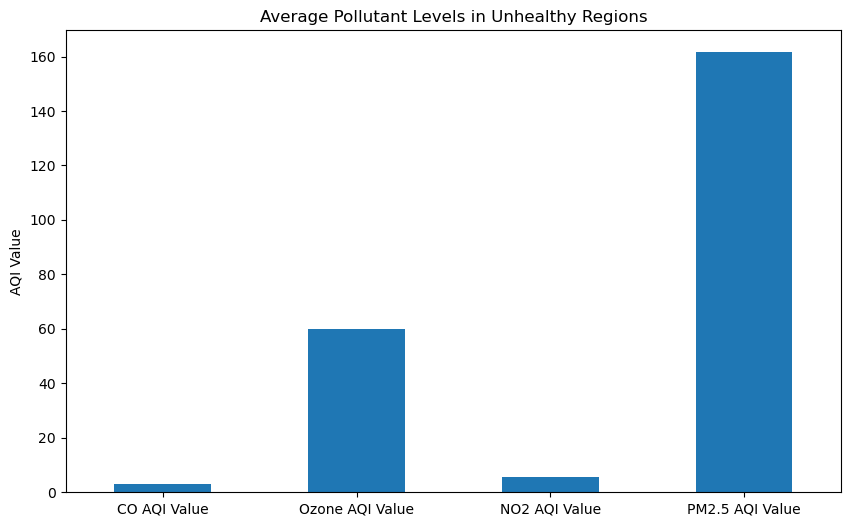

In [36]:
plt.figure(figsize=(10, 6))
unhealthy_regions[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().plot(kind='bar')
plt.title('Average Pollutant Levels in Unhealthy Regions')
plt.ylabel('AQI Value')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Calculate mean pollutants for each category

In [38]:
health_risk_analysis = relevant_data.groupby('AQI Value Category')[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean()
print("Average pollutant levels by AQI category:\n", health_risk_analysis)

Average pollutant levels by AQI category:
                                 CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value Category                                                             
Good                                0.773431        28.255471       1.480904   
Hazardous                           3.757895        58.610526       3.778947   
Moderate                            1.299409        31.251149       3.658897   
Unhealthy                           3.125472        69.976415       5.469340   
Unhealthy for Sensitive Groups      2.168734        42.553350       5.391439   
Very Unhealthy                      5.222997        84.386760       7.912892   

                                PM2.5 AQI Value  
AQI Value Category                               
Good                                  31.668765  
Hazardous                            401.036842  
Moderate                              65.654082  
Unhealthy                            163.437264  
Unhealthy for Se

In [ ]:
# Create a bar plot summarizing the average pollutants by category

<Figure size 1200x600 with 0 Axes>

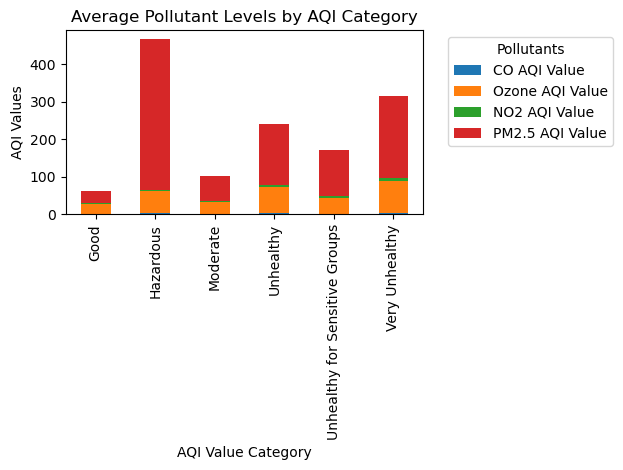

In [40]:
plt.figure(figsize=(12, 6))
health_risk_analysis.plot(kind='bar', stacked=True)
plt.title('Average Pollutant Levels by AQI Category')
plt.ylabel('AQI Values')
plt.legend(title='Pollutants', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate data by the countries

In [42]:
country_pollutants = dfc.groupby('Country')[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().reset_index()

In [ ]:
# Identify top polluted countries by PM2.5 levels since this pollutant has the highest average AQI values

In [44]:
top_polluted_countries = country_pollutants.sort_values(by='PM2.5 AQI Value', ascending=False).head(10)

<Figure size 2000x1500 with 0 Axes>

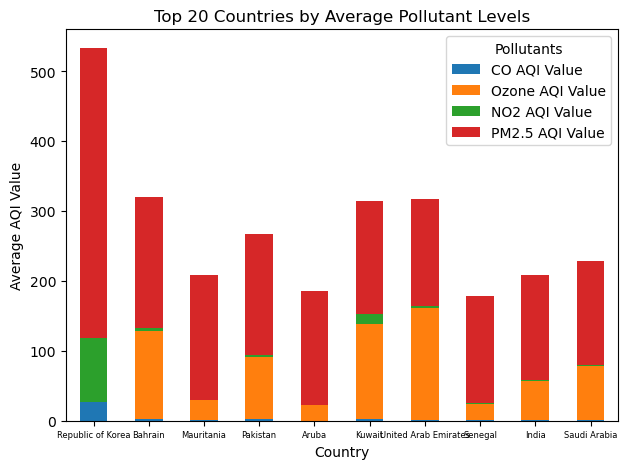

In [56]:
country_pollutants = dfc.groupby('Country')[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().reset_index()
top_polluted_countries = country_pollutants.sort_values(by='PM2.5 AQI Value', ascending=False).head(10)
plt.figure(figsize=(20, 15))
top_polluted_countries.set_index('Country').plot(kind='bar', stacked=True)
plt.title('Top 20 Countries by Average Pollutant Levels')
plt.ylabel('Average AQI Value')
plt.xlabel('Country')
plt.legend(title='Pollutants')
plt.xticks(rotation=0)
plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()